In [1]:
## Problem

#Prédire le prix de vente de lots d'un fruit

## Data

#Un dataset contenat des enregistrements de vente d'un fruit

In [2]:
#Tout d'abord, lisez le fichier fruit_price.csv
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.read_csv('D2FRecrutement/fruit_price/fruit_price.csv')
#J'ai besoin d'observer la structure de la table.
df
#Ce tableau contient les colonnes suivantes:
#Unnamed: 0 : Il s'agit du numéro d'index des données de chaque région，Je n'en ai pas besoin, je peux donc le supprimer
#Date : Ce sont des données très intéressantes, je peux les utiliser, mais je dois les traiter.
#AveragePrice : C'est sont les prix que j'ai besoin d'analyser et de prédire.
#Total Volume, 4046, 4225, 4770, Total Bags,Small Bags,Large Bags,XLarge Bags: des facteurs qu'on peut utiliser.
#type,region: ces sont des variables qualitatives, je peux utiliser One Hot Encoding
#year: year est déjà incluse dans Date

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
#Date
#"Date" est un facteur très utile, mais je ne peux pas l'utiliser directement.
#Puisque nous avons des données de 2015-2018, j'ai converti "Date" en combien de jours se sont écoulés depuis le nouvel an de cette année.
#Cela transformera "date" en une variable quantitative
from datetime import datetime
def date_diff(date):#Il Peut calculer le nombre de jours écoulés depuis le nouvel an
    first_new_year=str(date[0:4])+"-01-01"
    date = datetime.strptime(date, '%Y-%m-%d')
    first_new_year = datetime.strptime(first_new_year, '%Y-%m-%d')
    return (date-first_new_year).days

df['date_newyear_num']=df["Date"].apply(lambda x : date_diff(x))

Data Visualisation

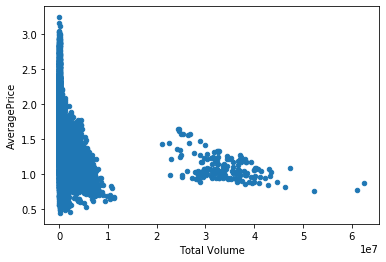

In [5]:
#Tout d'abord, je peux utiliser la visualisation des données pour comprendre la relation entre chaque facteur et le prix.
df.plot.scatter(x="Total Volume",y="AveragePrice")
#Ici, je ne vois pas clairement de relation entre le prix et "Total Volume".

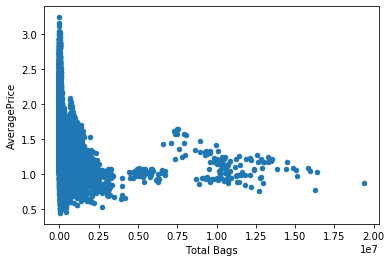

In [6]:
df.plot.scatter(x="Total Bags",y="AveragePrice")
#Je ne vois pas clairement de relation entre le prix et "Total Bags".

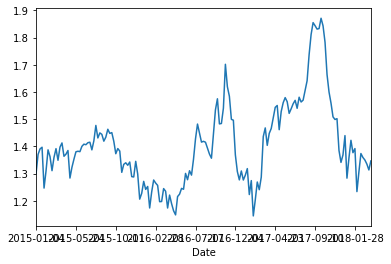

In [7]:
df.groupby('Date')['AveragePrice'].mean().plot(kind='line')
#Je vois que le prix est lié à la "date".

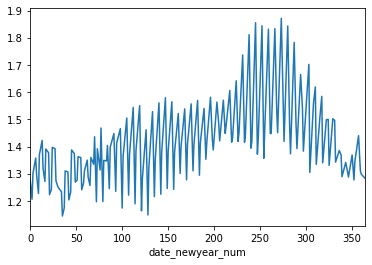

In [8]:
df.groupby('date_newyear_num')['AveragePrice'].mean().plot(kind='line')

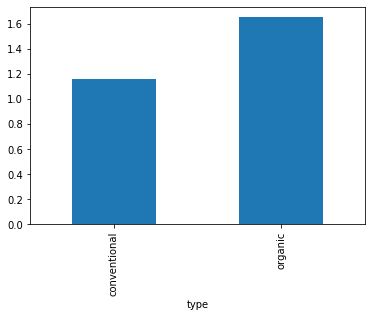

In [9]:
df.groupby('type')['AveragePrice'].mean().plot(kind='bar')
#Je vois que le prix peut-être lié à la "type".

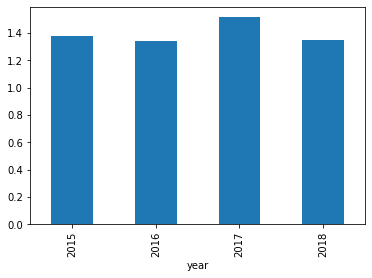

In [10]:
df.groupby('year')['AveragePrice'].mean().plot(kind='bar')
#Je ne vois pas clairement de relation entre le prix et "year".

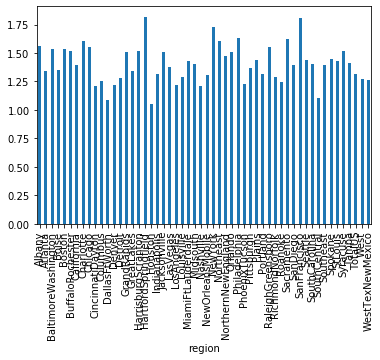

In [11]:
df.groupby('region')['AveragePrice'].mean().plot(kind='bar')
#Je ne vois pas clairement de relation entre le prix et "region".

In [12]:
#Construire Une matrice de corrélation
corrMatt = df.corr()
corrMatt

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,date_newyear_num
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667,-0.782018
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.163380
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.025374
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.026572
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.023008
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033992
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022975
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023306
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020654
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.013014


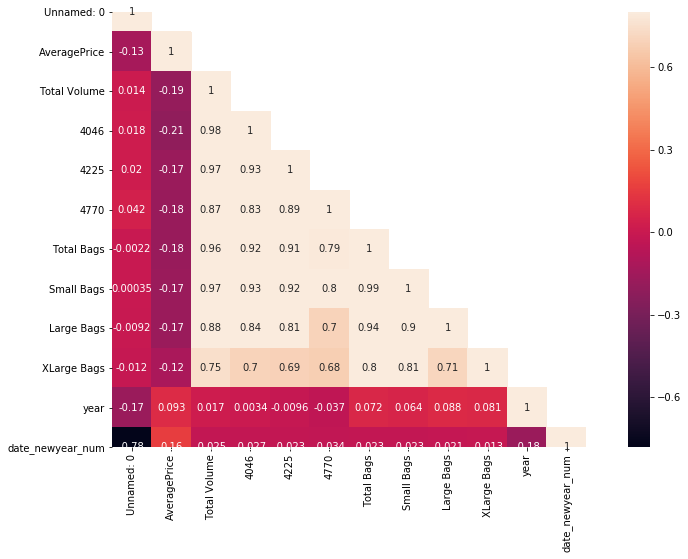

In [13]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
#J'utilise Heat Map pour représenter les relations entre divers facteurs et le prix. 
#J'ai trouvé que la plupart des facteurs sont liés à "prix", mais ils ne sont pas très pertinents. 
#Évidemment, je dois faire des traitements sur les variables.

Nettoyage de données

In [14]:
df.count()
#Utilisez la fonction de count() pour déterminer s'il existe des valeurs manquantes
#les résultats montrent qu'il n'y a pas de valeurs manquantes dans les données.

Unnamed: 0          18249
Date                18249
AveragePrice        18249
Total Volume        18249
4046                18249
4225                18249
4770                18249
Total Bags          18249
Small Bags          18249
Large Bags          18249
XLarge Bags         18249
type                18249
year                18249
region              18249
date_newyear_num    18249
dtype: int64

In [15]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,date_newyear_num
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,171.612143
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,108.009209
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,73.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,168.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,266.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,364.000000


In [16]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date_newyear_num
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,360
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,353
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,346
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,339
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,34
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,27
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,20
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,13


In [17]:
#Il ressemble que volume total = 4046 + 4225 + 4770 + Total Bags. Cependant, je dois le vérifier.
re_Total_Volume = pd.DataFrame((df["4046"]+df["4225"]+df["4770"]+df["Total Bags"])-df["Total Volume"])
#J'ai construit une nouvelle dataframe "re_Total_Volume", qui stocke la différence entre la somme de 4046, 4225, 4770, Total Bags et "Total Volume"
re_Total_Volume.describe()#résultat des statistiques

,0
count,18249.000000
mean,-2.082070
std,49.400866
min,-3938.750000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:
#Je peux voir qu'il y a pas mal de différences entre les deux. df["4046"]+df["4225"]+df["4770"]+df["Total Bags"] et df["Total Volume"]
#Mais cela peut également être dû à certaines erreurs après avoir arrondi les données. 
#Je me concentre donc uniquement sur combien de valeurs dans "re" dont la valeur absolue est supérieure à 1.
re_Total_Volume[(re_Total_Volume[0]> 1) | (re_Total_Volume[0]<-1)]
#Je vois qu'il y a encore des valeurs dans "re" dont la valeur absolue est supérieure à 1. 
#Comme je ne sais pas comment le "Volume total" est calculé, j'ai décidé de le garder.

,0
6415,-2.00
6945,-11.00
7581,-4.00
7687,-7.00
8323,-13.00
...,...
18220,-247.92
18221,-152.48
18222,-210.96
18223,-126.84


In [19]:
#Il ressemble que Total Bags = Small Bags+Large Bags+XLarge Bags. Cependant, je dois le vérifier.
re_Total_Bags = pd.DataFrame((df["Small Bags"]+df["Large Bags"]+df["XLarge Bags"])-df["Total Bags"])
#J'ai construit une nouvelle dataframe "re_Total_Bags"
re_Total_Bags.describe()#résultat des statistiques

,0
count,18249.000000
mean,-0.000712
std,0.064106
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
re_Total_Bags[(re_Total_Bags[0]> 1) | (re_Total_Bags[0]<-1)]
#Je vois que la valeur absolue de la différence entre "Total Bags" et "Small Bags + Large Bags + XLarge Bags" est toujours inférieure à 1. 
#Je pense que cela montre que "Total Bags" est approximativement égal à "Small Bags + Large Bags + XLarge Bags", 
#je pense donc que la colonne "Total Bags" peut être supprimée car les informations qu'elle contient sont bien exprimées dans les trois autres colonnes.

,0


In [21]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date_newyear_num
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,360
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,353
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,346
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,339
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,34
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,27
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,20
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,13


In [22]:
#Pour les trois variables qualitatives "type", "année" et "région", j'utilise One Hot Encoding pour les traiter.
df=pd.get_dummies(df,columns=['type'])
df=pd.get_dummies(df,columns=['year'])
df=pd.get_dummies(df,columns=['region'])

In [23]:
#Ensuite, j'ai supprimé 'Unnamed: 0', 'Date',"Total Bags" trois colonnes.
df = df.drop(['Unnamed: 0', 'Date','Total Bags'], axis=1)

In [24]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'date_newyear_num', 'type_conventional',
       'type_organic', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'region_Albany', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston', 'region_BuffaloRochester',
       'region_California', 'region_Charlotte', 'region_Chicago',
       'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth',
       'region_Denver', 'region_Detroit', 'region_GrandRapids',
       'region_GreatLakes', 'region_HarrisburgScranton',
       'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis',
       'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles',
       'region_Louisville', 'region_MiamiFtLauderdale', 'region_Midsouth',
       'region_Nashville', 'region_NewOrleansMobile', 'region_NewYork',
       'region_Northeast', 'region_NorthernNewEngland', 'region_Orlando',

Les Valeurs Aberrantes

In [25]:
#Puisqu'il n'y a pas de valeurs nulles dans les données, j’ai appliqué la méthode des trois écarts-types pour supprimer les Valeurs Aberrantes (Outliers). 
outliers=np.abs(df["AveragePrice"]-df["AveragePrice"].mean()) >(3*df["AveragePrice"].std())
outliers = pd.DataFrame(outliers)
outliers_list = outliers.loc[outliers["AveragePrice"]==True]._stat_axis.values.tolist()

In [26]:
#131 valeurs aberrantes seront supprimées
len(outliers_list)

131

In [27]:
df = df.drop(index=outliers_list)

Plot Kde

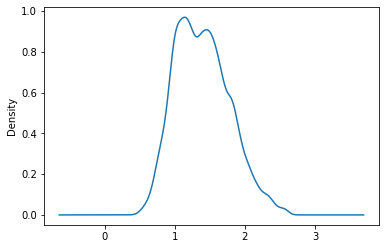

In [28]:
#Il s'agit d'un problème de régression, donc si la valeur cible suit la loi normale, cela fonctionnera bien pour de nombreux modèles.
df['AveragePrice'].plot(kind = 'kde')
#Ce graphique n'est pas une bonne distribution de la loi normale, il peut donc être difficile d'utiliser certains types de modèle linéaire.

In [29]:
df.to_csv("fruit_price_new.csv")
df

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,date_newyear_num,type_conventional,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,360,1,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,353,1,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,346,1,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,339,1,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,332,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,34,0,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,27,0,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,20,0,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,13,0,...,0,0,0,0,0,0,0,0,0,1


Machine Learning

In [30]:
df = pd.read_csv("fruit_price_new.csv", index_col=0)
df

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,date_newyear_num,type_conventional,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,360,1,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,353,1,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,346,1,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,339,1,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,332,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,34,0,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,27,0,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,20,0,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,13,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#Je commence la partie apprentissage automatique, j'utilise "AveragePrice" comme y et tous les autres facteurs comme X
X_feature = [col for col in df.columns.values if col != "AveragePrice"]
y_feature = ["AveragePrice"]
X = df.loc[:,X_feature]
y = df.loc[:,y_feature]

In [32]:
#Je divise au hasard le dataset en trainset et testset, le rapport 7: 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
#Comme je l'ai mentionné précédemment, il peut être difficile d'utiliser certains types de modèle linéaire. 
#Par conséquent, j'ai choisi deux méthodes d'apprentissage automatique: Random Forest Regression et Gradient Boosting Regression

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from tqdm import *
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.externals import joblib

D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [34]:
#J'utilise RMSE(root mean square error) et RMSLE(root mean squared logarithmic error) pour évaluer le modèle

def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test,y_pred))

Random Forest Regressor

In [35]:
#J'utilise GridSearch pour optimiser les hyperparameters 
#(je n'ai pas utilisé beaucoup d'hyperparameters en raison des performances limitées de mon ordinateur!!!)
estimator = RandomForestRegressor()
parameters = { 
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 1000, 2000],
    'random_state' : [0],
    'n_jobs' : [-1]
}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_RFR = GridSearchCV( estimator,
                          param_grid=parameters,
                          scoring = rmsle_scorer,
                          cv=5)

grid_RFR.fit(X=X_train,y=y_train.to_numpy().ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': [1, 2, 4],


In [36]:
#Afficher tous les parameters et RMSLE correspondant pour sélectionner les meilleurs parameters
means = grid_RFR.cv_results_['mean_test_score']
params = grid_RFR.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))
print(grid_RFR.best_params_)
print(grid_RFR.best_score_)

-0.052107  with:   {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}
-0.051661  with:   {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}
-0.051637  with:   {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000, 'n_jobs': -1, 'random_state': 0}
-0.052765  with:   {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}
-0.052338  with:   {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}
-0.052306  with:   {'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 2000, 'n_jobs': -1, 'random_state': 0}
-0.054597  with:   {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 0}
-0.054275  with:   {'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000, 'n_jobs': -1, 'random_state': 0}
-0.054259  with:   {'min_

In [37]:
pre=grid_RFR.predict(X_test)
print('RMSLE：',rmsle(y_test, pre))

RMSLE： 0.048731940518933814


In [38]:
#J'utilise les meilleurs paramètres pour entraîner le modèle
RFR = RandomForestRegressor(min_samples_leaf = grid_RFR.best_params_["min_samples_leaf"],
                            min_samples_split = grid_RFR.best_params_["min_samples_split"],
                            n_estimators = grid_RFR.best_params_["n_estimators"],
                            random_state=0, 
                            n_jobs=-1)
RFR.fit(X=X_train,y=y_train.to_numpy().ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [39]:
#J'ai utilisé le modèle pour prédire le testset, puis j'ai exprimé les erreurs en utilisant RMSE et RMSLE.
pre=RFR.predict(X_test)
print("RMSE of Random Forest Regression: ", rmse(y_test, pre))
print("RMSLE of Random Forest Regression: ", rmsle(y_test, pre))

RMSE of Random Forest Regression:  0.11888131211658974
RMSLE of Random Forest Regression:  0.048731940518933814


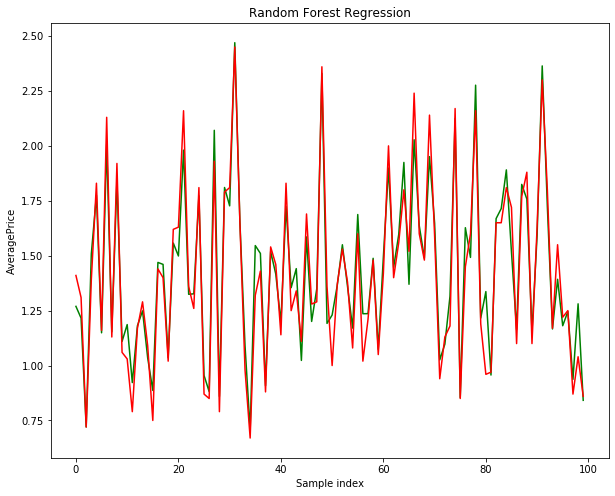

In [40]:
#RMSE 0.1188 RMSLE 0.0487 D'après la figure suivante, il semble que les résultats du modèle sont assez bons. 
x_axix = list(range(100))
plt.figure(figsize=(10,8))
plt.title('Random Forest Regression')
plt.plot(x_axix, pre[0:100], color='green', label='Prediction')
plt.plot(x_axix, y_test[0:100], color='red', label='Reality')
plt.xlabel('Sample index')
plt.ylabel('AveragePrice')
plt.show()

In [41]:
#Enregistrer le modèle "RFR.pkl" 
with open('RFR.pkl', 'wb') as f:
    joblib.dump(RFR, 'RFR.pkl')

Gradient Boosting Regressor

In [42]:
#J'utilise GridSearch pour optimiser les hyperparameters 
#(je n'ai pas utilisé beaucoup d'hyperparameters en raison des performances limitées de mon ordinateur!!!)
estimator = GradientBoostingRegressor()
parameters = { 
    'n_estimators':[100,500,1000],
    'learning_rate': [0.1,0.05,0.02],
    'max_depth':[4,3,2],
    'min_samples_leaf':[1,2,3]
}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_GBR = GridSearchCV( estimator,
                          param_grid=parameters,
                          scoring = rmsle_scorer,
                          cv=5)

grid_GBR.fit(X=X_train,y=y_train.to_numpy().ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [43]:
#Afficher tous les parameters et RMSLE correspondant pour sélectionner les meilleurs parameters
means = grid_GBR.cv_results_['mean_test_score']
params = grid_GBR.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))
print(grid_GBR.best_params_)
print(grid_GBR.best_score_)

-0.073053  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 100}
-0.052383  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 500}
-0.047197  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 1000}
-0.072912  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 100}
-0.052354  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 500}
-0.047154  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'n_estimators': 1000}
-0.072923  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 100}
-0.052299  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 500}
-0.047106  with:   {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'n_estimators': 1000}
-0.081604  with:   {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1

In [44]:
pre=grid_GBR.predict(X_test)
print('RMSLE：',rmsle(y_test, pre))

RMSLE： 0.046329261697857026


In [45]:
#J'utilise les meilleurs paramètres pour entraîner le modèle
GBR = GradientBoostingRegressor(n_estimators = grid_GBR.best_params_["n_estimators"],
                               learning_rate = grid_GBR.best_params_["learning_rate"],
                               max_depth = grid_GBR.best_params_["max_depth"],
                               min_samples_leaf = grid_GBR.best_params_["min_samples_leaf"])
GBR.fit(X=X_train,y=y_train)

D:\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
#J'ai utilisé le modèle pour prédire le testset, puis j'ai exprimé les erreurs en utilisant RMSE et RMSLE.
pre=GBR.predict(X_test)
print("RMSE of Gradient Boosting Regression: ", rmse(y_test, pre))
print("RMSLE of Gradient Boosting Regression: ", rmsle(y_test, pre))

RMSE of Gradient Boosting Regression:  0.11429931331639777
RMSLE of Gradient Boosting Regression:  0.046339920202650216


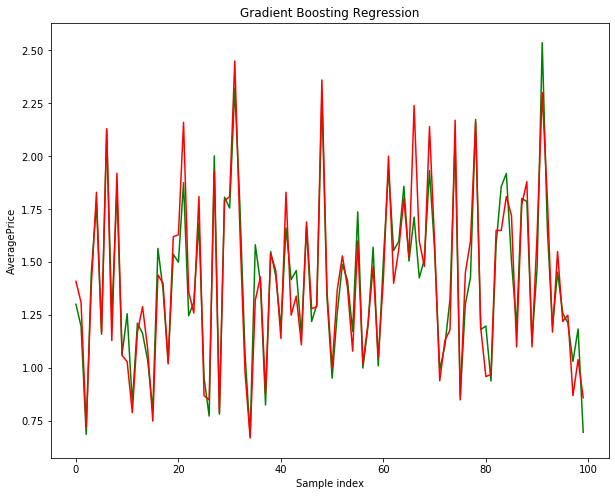

In [49]:
#RMSE 0.1142 RMSLE 0.0463 D'après la figure suivante, il semble que les résultats du modèle sont assez bons.
#Et les résultats de Gradient Boosting Regression(RMSE-0.1142,RMSLE-0.0463) sont meilleurs que les résultats de Random Forest Regression(RMSE-0.1188,RMSLE-0.0487)
#donc le meilleur modèle que j'ai obtenu est Gradient Boosting Regression
x_axix = list(range(100))
plt.figure(figsize=(10,8))
plt.title('Gradient Boosting Regression')
plt.plot(x_axix, pre[0:100], color='green', label='Prediction')
plt.plot(x_axix, y_test[0:100], color='red', label='Reality')
plt.xlabel('Sample index')
plt.ylabel('AveragePrice')
plt.show()

In [48]:
#Enregistrer le modèle "GBR.pkl" 
with open('GBR.pkl', 'wb') as f:
    joblib.dump(GBR, 'GBR.pkl')

Les facteurs les plus importantes

In [50]:
#Charger le modèle "GBR.pkl" 
GBR = joblib.load("GBR.pkl")

In [51]:
#le classement de l'influence de divers facteurs sur le prix.
indies = np.argsort(GBR.feature_importances_, kind='heapsort')[::-1]
for index in indies:
    print({X_feature[index]:GBR.feature_importances_[index]})

{'type_conventional': 0.2098536258268962}
{'type_organic': 0.17364420040853612}
{'date_newyear_num': 0.09219699701717347}
{'Large Bags': 0.08839090751951344}
{'4046': 0.07998609099786888}
{'4225': 0.053404895548166416}
{'year_2017': 0.04950199964508371}
{'Total Volume': 0.04077686667182434}
{'Small Bags': 0.03767649611934359}
{'4770': 0.020826132298218076}
{'year_2015': 0.014279752152229297}
{'region_HartfordSpringfield': 0.013668074714556028}
{'year_2016': 0.012871507367985214}
{'region_SanFrancisco': 0.009830885179492745}
{'region_NewYork': 0.008246670017455464}
{'region_Northeast': 0.006828731339511585}
{'region_Louisville': 0.004880660911790152}
{'region_Houston': 0.004637001602934404}
{'region_DallasFtWorth': 0.004347963293911974}
{'region_Nashville': 0.0036736831182289623}
{'region_RichmondNorfolk': 0.0033985159362032403}
{'region_PhoenixTucson': 0.003203203542549949}
{'region_Roanoke': 0.003096642575427951}
{'year_2018': 0.002959239367165082}
{'region_SouthCentral': 0.0028702824